# Machine learning Example with Keras: recognizing hand-written digits

In this notebook, we will discover Keras, which is a popular library in Python for machine learning methods.

In order to import libraries successfully, you must first download them to your PC (if you are running programs locally). If you are using Binder, then please ignore this cell.

**Step 1:** There are several options to download Keras:

    1. type the following in your terminal: "sudo pip install keras"
    2. From Anaconda navigator, go to 'Environments', select 'base(root)', and then search for Keras. Select it and choose Apply.
    
**Step 2:** Keras runs on a TensorFlow backend, so you must also download TensorFlow for it to work:

    1. From Anaconda navigator, go to 'Environments', select 'base(root)', and then search for Keras
    
    
Once you install them, you are ready to use Keras!
    

## Step 1: Import libraries

"Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation."
https://keras.io/


In [1]:
# Import the library
import keras 

# From sub-libraries, import specific objects 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

# Note that if you receive an error: "No module named 'keras'", it means that you need 
# to download Keras first:
# sudo pip install keras

/Users/farahshamout/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# matplotlib is a useful library for creating nice visualizations. You do not need to install it!
import matplotlib.pyplot as plt
import numpy as np

### Helper function for plotting images imported from an online tutorial:
https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/03C_Keras_API.ipynb


In [3]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

### Helper function for plotting wrong predictions also imported from the tutorial!

In [4]:
def plot_example_errors(cls_pred):
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Boolean array whether the predicted class is incorrect.
    incorrect = (cls_pred != y_test)
    # Get the images from the test-set that have been
    # incorrectly classified.
    ims = x_test_flat[incorrect]
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = y_test[incorrect]
    # Plot the first 9 images.
    plot_images(images=ims[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

## Step 2: Let's load some data ! The MNIST dataset contains 70000 handwritten digits with corresponding number labels
With Keras, we simply use the "mnist" library, and call load_data()

In [5]:
# the data, split between train and test sets
# The training set is used for development, and the test set is used to validate the model 
# Note that x represents input, and y represents output

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to prepare it for the classifier
img_shape = [x_train.shape[1],x_train.shape[2]]

Note that the data is loaded to a (1) training set and (2) test set, YOU ARE READY TO DEVELOP A SUPERVISED MACHINE LEARNING MODEL!

### Investigate your data by plotting a few images
Let's use our function defined above to plot a few images and see how they look

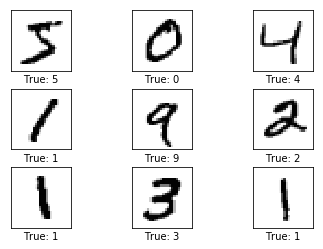

In [6]:
test_images = x_train[0:9]
classes_true = y_train[0:9]

plot_images(test_images, classes_true)

## Step 3: Data processing 
We will look more into this subject in following weeks, for now just execute the cell.

In [7]:
batch_size = 128
num_classes = 10
epochs = 20

# Pre-process the training and test set
# Reshape arrays 
x_train_flat = x_train.reshape(60000, 784)
x_test_flat = x_test.reshape(10000, 784)

# Change the type of values to float 
x_train_flat = x_train_flat.astype('float32')
x_test_flat = x_test_flat.astype('float32')

# Normalize the data
x_train_flat /= 255
x_test_flat /= 255

# convert class vectors to binary class matrices
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

print(x_train_flat.shape[0], 'train samples')
print(x_test_flat.shape[0], 'test samples')


60000 train samples
10000 test samples


In [8]:
### How does the data look like now?
print(x_train_flat.shape)
print(y_train_cat.shape)

(60000, 784)
(60000, 10)


### 3. Define the network.
We are defining a neural network with two hidden layers, each containing 512 neurons !
See how easy it is, compared to all our neuron classes from before !

In [18]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

### Let's print a summary of the model.
### Remember in the previous notebook, each neuron had only two weights, or "parameters?"
### How many are there in this network?
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### 4. Train the model
All that's left is to feed our model the training examples we have, and let's see if it learns anything

In [20]:
### Epochs are the number of times we show the training set to our model. 
### Indeed, just like for a human, we want to see each example several times to improve accuracy
epochs = 1

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_flat, y_train_cat,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_flat, y_test_cat))
score = model.evaluate(x_test_flat, y_test_cat, verbose=0)
print('Test loss:', score[0])
print('Test accuracy, the percentage of digits we predict accurately is :', 100*score[1], '%')

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 92s 2ms/step - loss: 0.2237 - acc: 0.9318 - val_loss: 0.1595 - val_acc: 0.9536
Test loss: 0.1595341492947191
Test accuracy, the percentage of digits we predict accurately is : 95.36 %


### 4. Model testing
Let's take a few images from the training set to look at predictions.

In [16]:
predictions = model.predict(x_test_flat)
class_pred = np.argmax(predictions, axis=1)

Note that [0:9] below chooses the first 8 elements of the list. This method is called slicing

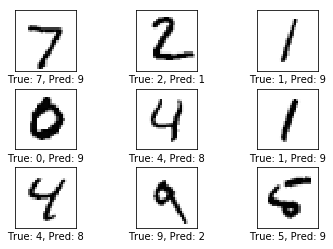

In [17]:
plot_images(x_test_flat[0:9], y_test[0:9], class_pred[0:9])

It is always a good idea to assess where your model went wrong as well!

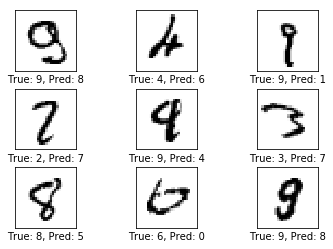

In [14]:
### We can look at which examples we're not classifying correctly
plot_example_errors(class_pred)